<a href="https://colab.research.google.com/github/Jaydeep4845/Sales-data-analysis-/blob/main/competitor_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd

# Upload CSV file
uploaded = files.upload()

# Get the filename (first key of uploaded dict)
filename = list(uploaded.keys())[0]

# Load CSV into Pandas DataFrame
df = pd.read_csv(filename)

Saving PBJ_Daily_Nurse_Staffing_Q2_2024.csv to PBJ_Daily_Nurse_Staffing_Q2_2024.csv


In [ ]:
df.head()

,PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,MDScensus,Hrs_RN,Hrs_RN_emp,Hrs_RN_ctr,...,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr,ctr_hours %,total_ctl_hours,total_emp_hours
0,025024,PROVIDENCE SEWARD MOUNTAIN HAVEN,SEWARD,AK,Kenai Peninsula,122,39,36,12,24,...,108,24,24,0,0,0,0,66,156,81
1,025024,PROVIDENCE SEWARD MOUNTAIN HAVEN,SEWARD,AK,Kenai Peninsula,122,39,41,17,24,...,96,11,11,0,0,0,0,59,144,100
2,025024,PROVIDENCE SEWARD MOUNTAIN HAVEN,SEWARD,AK,Kenai Peninsula,122,39,50,38,12,...,96,0,0,0,0,0,0,54,132,110
3,025024,PROVIDENCE SEWARD MOUNTAIN HAVEN,SEWARD,AK,Kenai Peninsula,122,38,36,12,24,...,104,24,24,0,0,0,0,57,152,112
4,025024,PROVIDENCE SEWARD MOUNTAIN HAVEN,SEWARD,AK,Kenai Peninsula,122,38,24,12,13,...,97,37,37,0,0,0,0,52,134,125


In [ ]:
df_grouped_by_cities = df.groupby('CITY',as_index=False).agg(
    total_ctl_hours=('total_ctl_hours','sum'),
    total_emp_hours=('total_emp_hours','sum'),
    distinct_provnum=('PROVNUM', 'nunique')
)

In [ ]:
df_sorted = df_grouped_by_cities[['CITY','distinct_provnum', 'total_ctl_hours', 'total_emp_hours']]\
    .sort_values(by=['distinct_provnum','total_ctl_hours', 'total_emp_hours'], ascending=[False, False, False])
df_sorted.head(15)

,CITY,distinct_provnum,total_ctl_hours,total_emp_hours
809,WILMINGTON,9,22675,17435
570,PITTSBURGH,8,118049,85583
27,BALTIMORE,8,8969,7170
81,BRONX,7,52045,44373
578,PORTLAND,7,39699,27302
562,PHILADELPHIA,7,8505,7065
135,CINCINNATI,7,4482,3317
124,CHARLOTTE,6,16432,8818
596,RICHMOND,6,13711,10691
371,LAKEWOOD,6,5056,3969


<ipython-input-5-5497ab635f08>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CITY', y='distinct_provnum', data=top_15, palette='viridis')


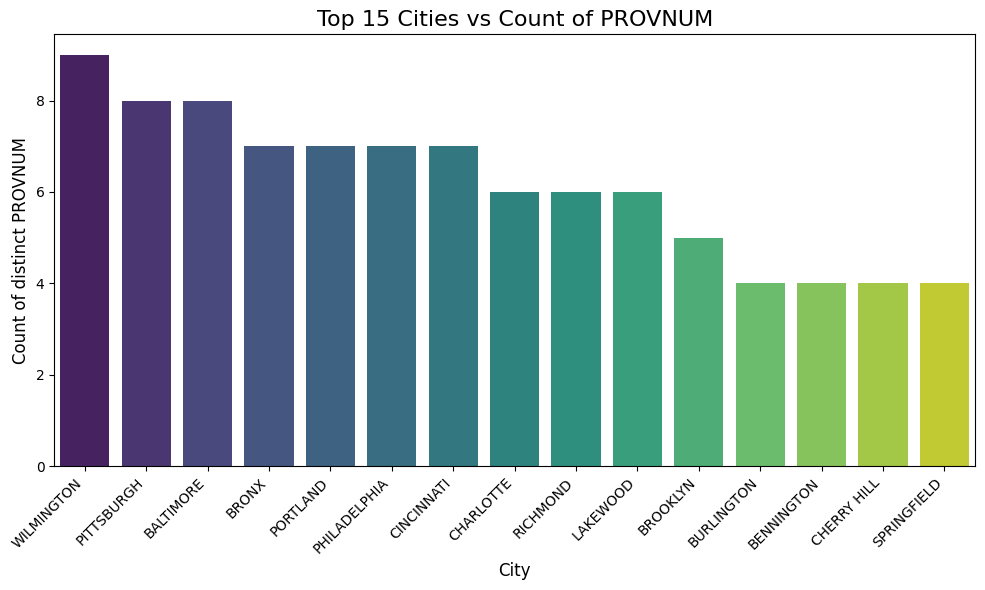

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_sorted is your DataFrame and 'distinct_provnum' is a column representing the count
# Let's get the top 15 rows based on the distinct_provnum

top_15 = df_sorted.head(15)

# Create a bar plot for City vs count of distinct_provnum
plt.figure(figsize=(10, 6))
sns.barplot(x='CITY', y='distinct_provnum', data=top_15, palette='viridis')

# Adding labels and title
plt.title('Top 15 Cities vs Count of PROVNUM', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Count of distinct PROVNUM', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()
